### Two Dimensional Histogram Filter 

Part 1: Exploring the code

In this section, We will just run some existing code to get a feel for what this localizer does.

In [1]:
from __future__ import division, print_function
# This code "imports" code from some of the other files we've written
# in this directory. Specifically simulate.py and helpers.py
import simulate as sim
import helpers
import localizer

# Don't worry too much about this code for now...

%load_ext autoreload
%autoreload 2

initialize_beliefs:  [[0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04]]
All colors: ['r', 'g']


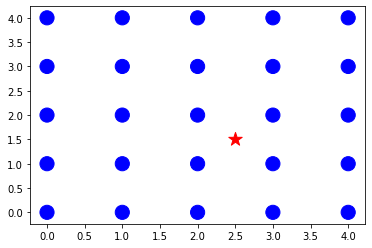

In [2]:
# This code defines a 5x5 robot world as well as some other parameters
# which we will discuss later. It then creates a simulation and shows 
# the initial beliefs. 
R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R],
    [G,G,R,G,R],
    [G,R,G,G,G],
    [R,R,G,R,G],
    [R,G,R,G,R],
]
blur = 0.05
p_hit = 200.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

New Beliefs:  [[0.00035574528637495557, 0.0711490572749911, 0.0711490572749911, 0.0711490572749911, 0.00035574528637495557], [0.0711490572749911, 0.0711490572749911, 0.00035574528637495557, 0.0711490572749911, 0.00035574528637495557], [0.0711490572749911, 0.00035574528637495557, 0.0711490572749911, 0.0711490572749911, 0.0711490572749911], [0.00035574528637495557, 0.00035574528637495557, 0.0711490572749911, 0.00035574528637495557, 0.0711490572749911], [0.00035574528637495557, 0.0711490572749911, 0.00035574528637495557, 0.0711490572749911, 0.00035574528637495557]]
dy value is  1 dx value is  -1
Move  [[0.0711490572749911, 0.00035574528637495557, 0.0711490572749911, 0.00035574528637495557, 0.00035574528637495557], [0.0711490572749911, 0.0711490572749911, 0.0711490572749911, 0.00035574528637495557, 0.00035574528637495557], [0.0711490572749911, 0.00035574528637495557, 0.0711490572749911, 0.00035574528637495557, 0.0711490572749911], [0.00035574528637495557, 0.0711490572749911, 0.071149057274

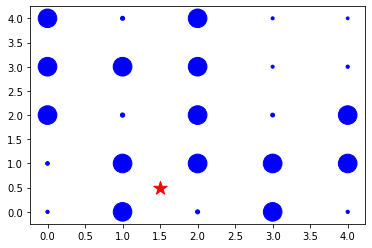

In [3]:
simulation.run(1)
simulation.show_beliefs()

In [4]:
# We will provide you with the function below to help you look
# at the raw numbers.

def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end="  ")
        print()
        
# The {:0.3f} notation is an example of "string 
# formatting" in Python. You can learn more about string 
# formatting at https://pyformat.info/

In [5]:
show_rounded_beliefs(simulation.beliefs)

0.069  0.003  0.069  0.002  0.002  
0.070  0.070  0.069  0.002  0.002  
0.070  0.004  0.070  0.003  0.069  
0.003  0.069  0.070  0.070  0.069  
0.002  0.069  0.003  0.069  0.002  


### Part 2: Implement a 2D sense function.

As you can see, the robot's beliefs aren't changing. No matter how many times we call the simulation's sense method, nothing happens. The beliefs remain uniform.

#### Instructions

Open localizer.py and complete the sense function.

Run the code in the cell below to import the localizer module (or reload it) and then test your sense function.

If the test passes, you've successfully implemented your first feature! Keep going with the project. If your tests don't pass (they likely won't the first few times you test), keep making modifications to the sense function until they do!

In [6]:
def test_sense():
    R = 'r'
    _ = 'g'

    simple_grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]

    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]

    observation = R

    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]

    p_hit  = 3.0
    p_miss = 1.0
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)
    
    print("Manually Calculated Beliefs ",expected_beliefs_after,"\n")
    print("Beliefs after Sensing ",beliefs_after_sensing)


    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
        
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect height")
        return
              
    elif len(beliefs_after_sensing[0] ) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
        
    total_probability = 0.0
    for row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        
        print("Your beliefs appear to not be normalized")
        return
    
    print("Something isn't quite right with your sense function")

test_sense()

Manually Calculated Beliefs  [[0.09090909090909091, 0.09090909090909091, 0.09090909090909091], [0.09090909090909091, 0.2727272727272727, 0.09090909090909091], [0.09090909090909091, 0.09090909090909091, 0.09090909090909091]] 

Beliefs after Sensing  [[0.09090909090909091, 0.09090909090909091, 0.09090909090909091], [0.09090909090909091, 0.27272727272727276, 0.09090909090909091], [0.09090909090909091, 0.09090909090909091, 0.09090909090909091]]
Tests pass! Your sense function is working as expected


### Integration Testing

Before we call this "complete" we should perform an integration test. We've verified that the sense function works on it's own, but does the localizer work overall?

Let's perform an integration test. First you you should execute the code in the cell below to prepare the simulation environment.

In [7]:
from simulate import Simulation
import simulate as sim
import helpers
# reload(localizer)
# reload(sim)
# reload(helpers)

R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
    [R,G,R,G,R,R,R],
    [G,R,R,R,G,R,G],
    [R,R,R,G,R,G,G],
]

# Use small value for blur. This parameter is used to represent
# the uncertainty in MOTION, not in sensing. We want this test
# to focus on sensing functionality
blur = 0.1
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

initialize_beliefs:  [[0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612], [0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612], [0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612], [0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612], [0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612], [0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612], [0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612,

New Beliefs:  [[0.03961965134706815, 0.0003961965134706814, 0.0003961965134706814, 0.0003961965134706814, 0.03961965134706815, 0.03961965134706815, 0.03961965134706815], [0.0003961965134706814, 0.0003961965134706814, 0.03961965134706815, 0.0003961965134706814, 0.03961965134706815, 0.0003961965134706814, 0.03961965134706815], [0.0003961965134706814, 0.03961965134706815, 0.0003961965134706814, 0.0003961965134706814, 0.0003961965134706814, 0.0003961965134706814, 0.03961965134706815], [0.03961965134706815, 0.03961965134706815, 0.0003961965134706814, 0.03961965134706815, 0.0003961965134706814, 0.0003961965134706814, 0.0003961965134706814], [0.03961965134706815, 0.0003961965134706814, 0.03961965134706815, 0.0003961965134706814, 0.03961965134706815, 0.03961965134706815, 0.03961965134706815], [0.0003961965134706814, 0.03961965134706815, 0.03961965134706815, 0.03961965134706815, 0.0003961965134706814, 0.03961965134706815, 0.0003961965134706814], [0.03961965134706815, 0.03961965134706815, 0.0396

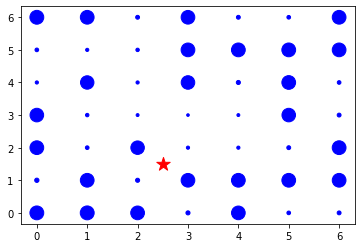

In [8]:
# Use control+Enter to run this cell many times and observe how 
# the robot's belief that it is in each cell (represented by the
# size of the corresponding circle) changes as the robot moves.
# The true position of the robot is given by the red star.

# Run this cell about 15-25 times and observe the results
simulation.run(1)
simulation.show_beliefs()

# If everything is working correctly you should see the beliefs
# converge to a single large circle at the same position as the 
# red star. Though, if your sense function is implemented correctly
# and this output is not converging as expected.. it may have to do
# with the `move` function bug; your next task!
#
# When you are satisfied that everything is working, continue
# to the next section

### Part 3: Identify and Reproduce a Bug

Software has bugs. That's okay.

A user of your robot called tech support with a complaint
"So I was using your robot in a square room and everything was fine. Then I tried loading in a map for a rectangular room and it drove around for a couple seconds and then suddenly stopped working. Fix it!"

Now we have to debug. We are going to use a systematic approach.

    Reproduce the bug
    Read (and understand) the error message (when one exists)
    Write a test that triggers the bug.
    Generate a hypothesis for the cause of the bug.
    Try a solution. If it fixes the bug, great! If not, go back to step 4.

### Step 1: Reproduce the bug

The user said that rectangular environments seem to be causing the bug.

The code below is the same as the code you were working with when you were doing integration testing of your new feature. See if you can modify it to reproduce the bug.

initialize_beliefs:  [[0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571], [0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571], [0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571], [0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571]]
All colors: ['r', 'g']
New Beliefs:  [[0.0006203473945409429, 0.06203473945409429, 0.06203473945409429, 0.06203473945409429, 0.0006203473945409429, 0.0006203473945409429, 0.0006203473945409429], [0.06203473945409429, 0.06203473945409429, 0.0006203473945409429, 0.06203473945409429, 0.0006203473945409429, 0.06203473945409429, 0.0006203473945409429], [0.06203473945409429, 0.00062034

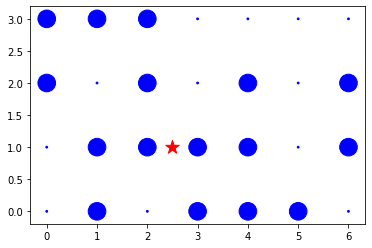

In [9]:
from simulate import Simulation
import simulate as sim
import helpers
# reload(localizer)
# reload(sim)
# reload(helpers)

R = 'r'
G = 'g'

grid = [ 
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
]

blur = 0.001
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

# remember, the user said that the robot would sometimes drive around for a bit...
# It may take several calls to "simulation.run" to actually trigger the bug.
simulation.run(1)
simulation.show_beliefs()

### Step 3: Write a test that reproduces the bug

This will help you know when you've fixed it and help you make sure you never reintroduce it in the future. You might have to try many potential solutions, so it will be nice to have a single function to call to confirm whether or not the bug is fixed

In [15]:
# According to the user, sometimes the robot actually does run "for a while" 
# - How can you change the code so the robot runs "for a while"?
# - How many times do you need to call simulation.run() to consistently
#   reproduce the bug?
# Modify the code below so that when the function is called 
# it consistently reproduces the bug.
def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers
#     reload(localizer)
#     reload(sim)
#     reload(helpers)

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
    ]

    blur = 0.001
    p_hit = 100.0
    for i in range(5):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
    
test_robot_works_in_rectangle_world()

initialize_beliefs:  [[0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571], [0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571], [0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571], [0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571]]
All colors: ['r', 'g']
New Beliefs:  [[0.0006203473945409429, 0.06203473945409429, 0.06203473945409429, 0.06203473945409429, 0.0006203473945409429, 0.0006203473945409429, 0.0006203473945409429], [0.06203473945409429, 0.06203473945409429, 0.0006203473945409429, 0.06203473945409429, 0.0006203473945409429, 0.06203473945409429, 0.0006203473945409429], [0.06203473945409429, 0.00062034